In [95]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # determine filename
        dir = os.path.dirname('__file__')
        f = os.path.join('./',filename)
        
        # load data
        with open(f, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.title('Testing Data')
        plt.savefig('p2_4a_2.jpg')
        plt.close()







Visualizing data...
Investigating linear regression...
Investigating polynomial regression...
1
2
3
4
5
6
7
8
9
10
Investigating regularized regression...
Done!


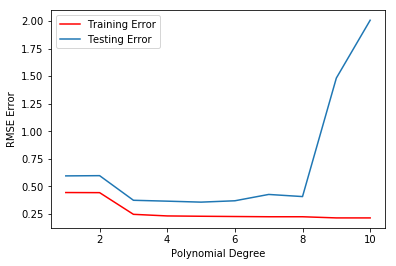

In [97]:
######################################################################
# main
######################################################################

def main() :
    # load data
    train_data = load_data('regression_train.csv')
    test_data = load_data('regression_test.csv')
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    #plot_data(train_data.X, train_data.y)
    #plot_data(test_data.X, test_data.y)
    
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    
    
    #print(train_data.X.shape)
    #model = PolynomialRegression()
    #model.coef_ = np.zeros(2)
    #model.predict(train_data.X)
    #model.fit_GD(train_data.X, train_data.y)
    #model.fit(train_data.X, train_data.y)
    #print(model.cost(train_data.X, train_data.y))
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    rmse_train = [0]*10
    rmse_test = [0]*10

    print('Investigating polynomial regression...')
    for i in range(1,11):
        print(i)
        model = PolynomialRegression(i)
        model.coef_ = np.zeros(i+1)
        model.predict(train_data.X)
        model.fit(train_data.X, train_data.y)
        rmse_train[i-1] = model.rms_error(train_data.X, train_data.y)
        rmse_test[i-1] = model.rms_error(test_data.X, test_data.y)
    ### ========== TODO : END ========== ###
    
    m = range(1,11)
    plt.figure()
    plt.plot(m,rmse_train, 'r',label='Training Error')
    plt.plot(m,rmse_test, '-',label='Testing Error')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('RMSE Error')
    plt.legend(loc=2)
    #plt.savefig('p2_4i.jpg')
    #plt.close()
    #plt.show()
    
    ### ========== TODO : START ========== ###
    # parts j-k (extra credit): main code for regularized regression
    print('Investigating regularized regression...')
        
    ### ========== TODO : END ========== ###
    
    
    print("Done!")

if __name__ == "__main__" :
    main()


In [88]:
import math
class PolynomialRegression() :
    
    def __init__(self, m=1, reg_param=0) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
            lambda_ -- float
                       regularization parameter
        """
        self.coef_ = None
        self.m_ = m
        self.lambda_ = reg_param
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        m = self.m_
        exponents = np.arange(0, m+1)
        Phi = np.power(X, exponents)
          
        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        if self.lambda_ != 0 :
            raise Exception("GD with regularization not implemented")
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(1+t) # change this line
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
                
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = self.predict(X)# change this line
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            loss = y_pred - y
            self.coef_  = self.coef_ - eta*np.dot(X.transpose(), loss)
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print('number of iterations: %d' % (t+1))
        
        return self
    
    
    def fit(self, X, y, l2regularize = None ) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            l2regularize    -- set to None for no regularization. set to positive double for L2 regularization
                
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        inv = np.linalg.pinv(np.dot(X.transpose(), X))
        
        self.coef_ = np.dot(np.dot(inv, X.transpose()), y)
        return self
        
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X,self.coef_)
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        n, d = X.shape
        cost = 0
        
        y_pred = self.predict(X)
        cost = np.sum(np.power(y - y_pred, 2))
        #for i in range(1, n+1):
            #cost += (y_pred - y[i-1])^2
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        n, d = X.shape
        error = math.sqrt(self.cost(X,y)/n)
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

In [3]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [12]:
os.path.join(os.path.dirname('__file__'), '..')

'..'

In [20]:
np.arange(1,)


array([1, 2, 3, 4, 5, 6])

In [30]:
exponents = np.arange(0, 6)
x2 = np.array([[2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3]])
np.power(x2, exponents)

array([[  1,   2,   4,   8,  16,  32],
       [  1,   3,   9,  27,  81, 243]])

In [30]:
np.ones([3, 1])

array([[ 1.],
       [ 1.],
       [ 1.]])

In [26]:
np.arange(0,2)

array([0, 1])

In [77]:
sqrt(100)

NameError: name 'sqrt' is not defined